# 미션 소개

- 포르투갈 은행의 마케팅 담당자

- 데이터: 2008년부터 2010년까지의 은행 마케팅 캠페인 데이터

- 목표: 이 데이터를 통해 고객이 정기 예금을 가입할 가능성을 예측
    - 이를 통해 마케팅 캠페인의 효율성을 높이는 것
    - 마케팅 담당자로서 정기 예금과 관련이 있는 요소들을 파악
    - 고객의 행동을 이해
    - 어떤 상황에서 어떤 고객들이 정기 예금을 가입할까

- 최종 목표: 가장 정확한 분류 모델을 개발
    - 고객이 정기 예금을 가입할지 여부를 예측
    - 그 모델을 통해 도출한 인사이트를 바탕으로 비즈니스 전략을 제시

# 논문 요약

- 연구 목적
    - 텔레마케팅 캠페인의 성공(예금 가입)을 예측하는 의사결정지원시스템(DSS) 개발
    - 고객 선별을 통해 마케팅 효율성 향상 및 비용 절감 목표

- 데이터 및 전처리
    - 데이터: 2008~2013년 사이 포르투갈 은행의 실제 텔레마케팅 데이터 (총 52,944건)
    - 레이블: 성공(예금 가입) 또는 실패
    - 문제점: 성공률이 12.38%로 불균형 데이터
    - 입력 변수: 총 150개 (고객 정보, 상품 정보, 사회·경제 지표 포함)

- 모델링 방법
    - 사용된 분류 알고리즘
        - 로지스틱 회귀 (LR)
        - 의사결정나무 (DT)
        - 신경망 (NN)
        - 서포트 벡터 머신 (SVM)
    - 평가 지표
        - ROC AUC
        - 누적 LIFT 곡선 (ALIFT)
    - 특징 선택: 반자동 방식으로 22개의 핵심 특징을 선별

- 주요 결과
    - **신경망(NN)**이 가장 높은 성능을 보임
    - AUC = 0.80
    - ALIFT = 0.67 (최신 데이터 기반 평가에서)
    - 상위 50% 예측 점수 고객을 대상으로 하면 성공 고객의 79%를 포착 가능
    - 중요 특징
        - 3개월 유리보(Euribor) 금리 (가장 중요한 변수)
        - 통화 방향 (인바운드/아웃바운드)
        - 상담원 경험
        - 제공 금리와 국가 평균 금리 간 차이
        - 이전 통화 시간

- 캠페인 적용 효과
    - 기존 전체 고객 대상 전화 전략 대비, 예측 기반 타겟팅을 통해 효율성과 고객 반응률 모두 향상
    - 절반의 고객에게만 전화를 걸어도 약 29%p 더 많은 성공적 가입 유도 가능

- 지식 추출
    - 민감도 분석과 의사결정나무를 통해 신경망 모델의 "블랙박스" 해소
    - 설명 가능한 인사이트 제공: 마케팅 시기, 경제 지표에 따른 전략 조정 가능

- 결론
    - 데이터 기반 DSS: 은행의 마케팅 전략 수립 및 실행에 실질적인 도움
    - 향후 연구: 입금 금액 예측, 다중 기간 분석, 개인별 행동 이력 반영 등

# 데이터 소개

|컬럼명|설명|
|---|---|
|age|나이 (숫자)|
|job|직업 (범주형)|
|marital|결혼 여부 (범주형)|
|education|교육 수준 (범주형)|
|default|신용 불량 여부 (범주형)|
|housing|주택 대출 여부 (범주형)|
|loan|개인 대출 여부 (범주형)|
|contact|연락 유형 (범주형)|
|month|마지막 연락 월 (범주형)|
|day_of_week|마지막 연락 요일 (범주형)|
|duration|마지막 연락 지속 시간, 초 단위 (숫자)|
|campaign|캠페인 동안 연락 횟수 (숫자)|
|pdays|이전 캠페인 후 지난 일수 (숫자)|
|previous|이전 캠페인 동안 연락 횟수 (숫자)|
|poutcome|이전 캠페인의 결과 (범주형)|
|emp.var.rate|고용 변동률 (숫자)|
|cons.price.idx|소비자 물가지수 (숫자)|
|cons.conf.idx|소비자 신뢰지수 (숫자)|
|euribor3m|3개월 유리보 금리 (숫자)|
|nr.employed|고용자 수 (숫자)|
|y|정기 예금 가입 여부 (이진: yes=1, no=0)|

# 라이브러리

In [1]:
!pip install koreanize_matplotlib -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.6 MB/s eta 0:00:00


In [2]:
bank_data_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트 미션/미션_15/data/bank-additional-full.csv"

bank_df = pd.read_csv(bank_data_path, sep=";")

In [3]:
bank_df["y"] = bank_df["y"].map({"no": 0, "yes": 1})

In [4]:
# y를 문자열로 매핑한 새 컬럼 생성
bank_df["y_label"] = bank_df["y"].map({0: "No", 1: "Yes"})

- 회귀모델에 비해 분류모델이 더 이상치에 민감한가?
    - No, 회귀모델이 이상치에 더 민감
    - 분류모델은 자체적으로 걸러주는 느낌이 있음
    - but, 이상치 처리 전혀 안하고 "분류모델이라서 알아서 걸러주는데요?"는 안됨
    - 적당한 선 내에서 전처리는 동일하게 진행해야함

# EDA

## 타겟 분포 확인

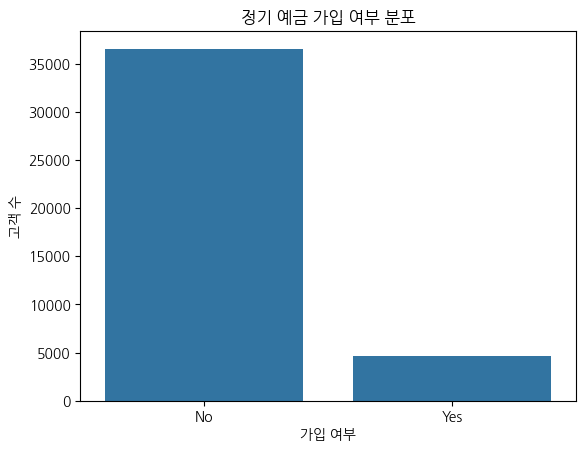

In [5]:
# 타겟 분포 확인
sns.countplot(data=bank_df, x="y")
plt.title("정기 예금 가입 여부 분포")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("가입 여부")
plt.ylabel("고객 수")
plt.show()

- 정기예금에 가입하지 않은 유저의 수가 훨씬 많음

## 수치형 변수 별 가입 여부

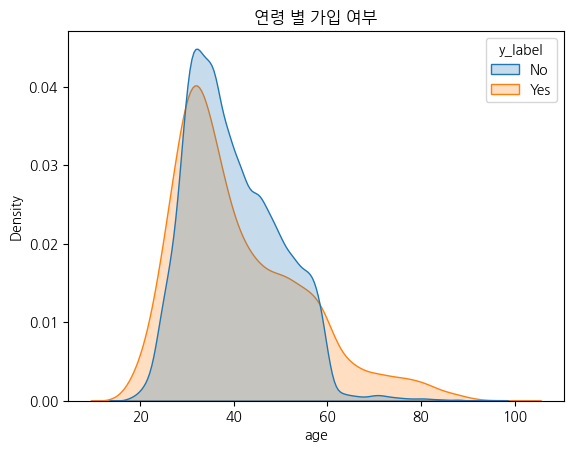

In [6]:
# age vs y
sns.kdeplot(data=bank_df, x="age", hue="y_label", common_norm=False, fill=True)
plt.title("연령 별 가입 여부")
plt.show()

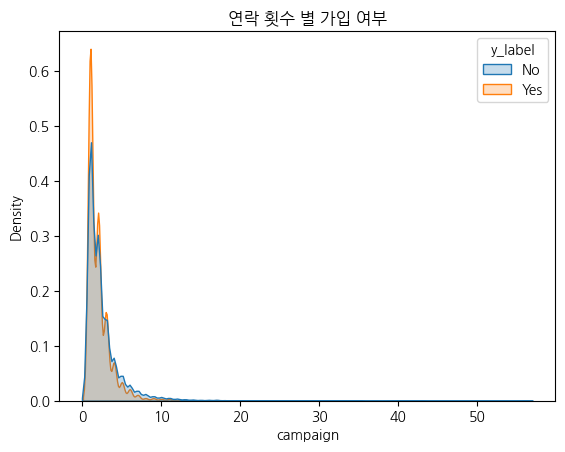

In [7]:
# campaign vs y
sns.kdeplot(data=bank_df, x="campaign", hue="y_label", common_norm=False, fill=True)
plt.title("연락 횟수 별 가입 여부")
plt.show()

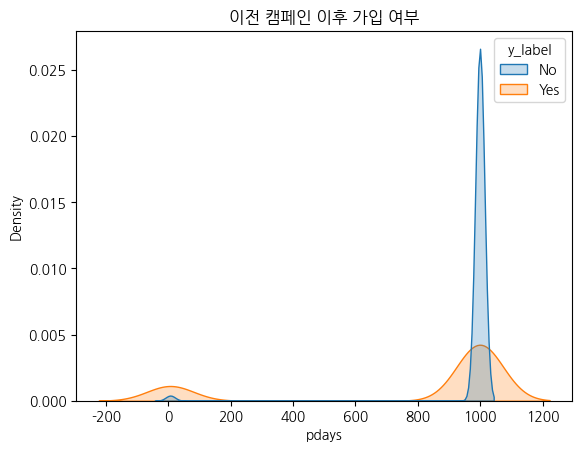

In [8]:
# pdays vs y
sns.kdeplot(data=bank_df, x="pdays", hue="y_label", common_norm=False, fill=True)
plt.title("이전 캠페인 이후 가입 여부")
plt.show()

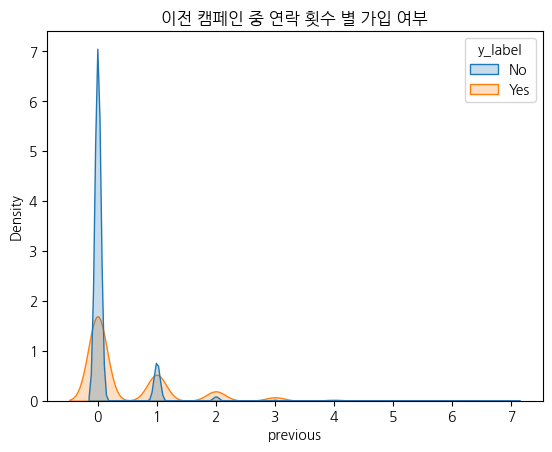

In [9]:
# previous vs y
sns.kdeplot(data=bank_df, x="previous", hue="y_label", common_norm=False, fill=True)
plt.title("이전 캠페인 중 연락 횟수 별 가입 여부")
plt.show()

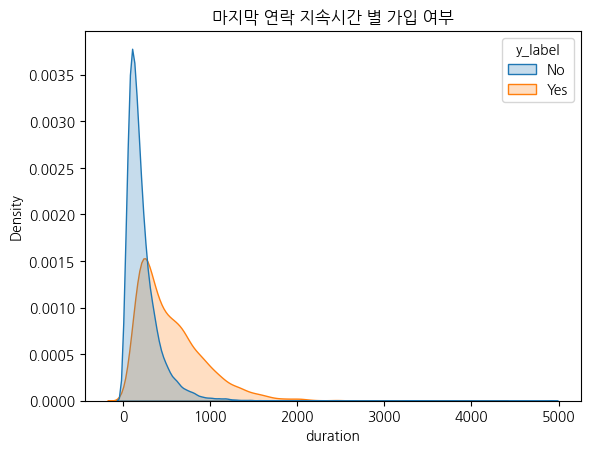

In [10]:
# duration vs y
sns.kdeplot(data=bank_df, x="duration", hue="y_label", common_norm=False, fill=True)
plt.title("마지막 연락 지속시간 별 가입 여부")
plt.show()

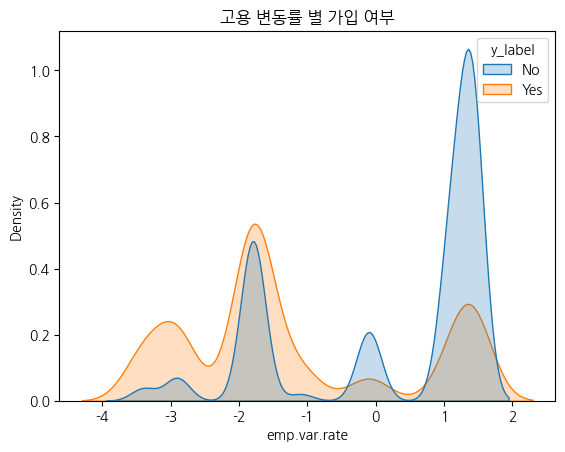

In [11]:
# emp.var.rate vs y
sns.kdeplot(data=bank_df, x="emp.var.rate", hue="y_label", common_norm=False, fill=True)
plt.title("고용 변동률 별 가입 여부")
plt.show()

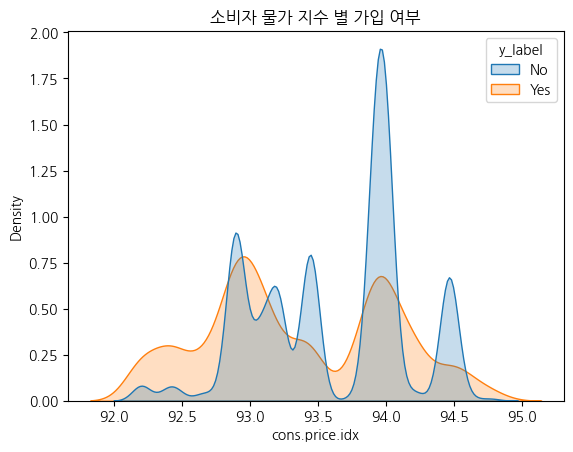

In [12]:
# cons.price.idx vs y
sns.kdeplot(data=bank_df, x="cons.price.idx", hue="y_label", common_norm=False, fill=True)
plt.title("소비자 물가 지수 별 가입 여부")
plt.show()

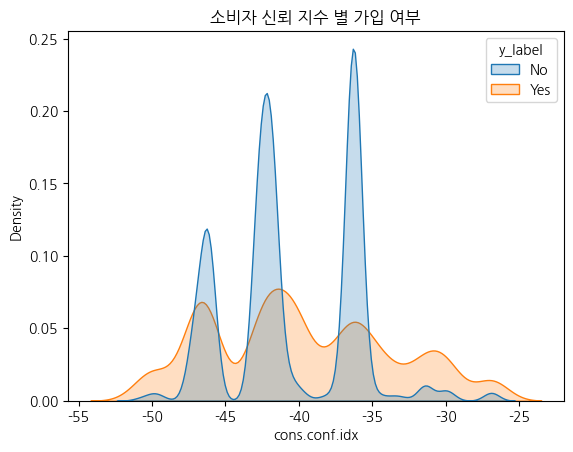

In [13]:
# cons.conf.idx vs y
sns.kdeplot(data=bank_df, x="cons.conf.idx", hue="y_label", common_norm=False, fill=True)
plt.title("소비자 신뢰 지수 별 가입 여부")
plt.show()

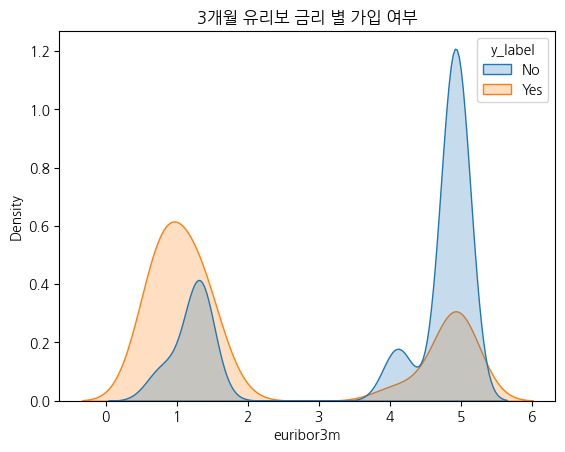

In [14]:
# euribor3m vs y
sns.kdeplot(data=bank_df, x="euribor3m", hue="y_label", common_norm=False, fill=True)
plt.title("3개월 유리보 금리 별 가입 여부")
plt.show()

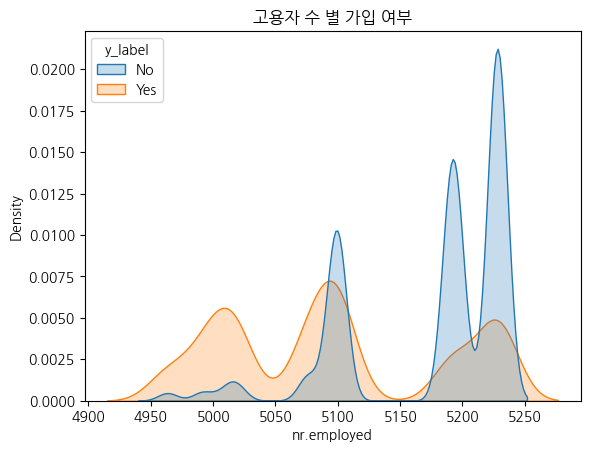

In [15]:
# nr.employed vs y
sns.kdeplot(data=bank_df, x="nr.employed", hue="y_label", common_norm=False, fill=True)
plt.title("고용자 수 별 가입 여부")
plt.show()

## 범주형 변수 별 가입 여부

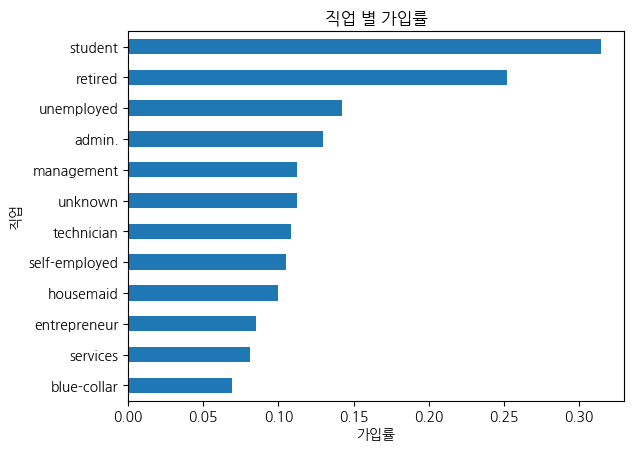

In [16]:
# job vs y
target_ratio = bank_df.groupby("job")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("직업 별 가입률")
plt.xlabel("가입률")
plt.ylabel("직업")
plt.show()

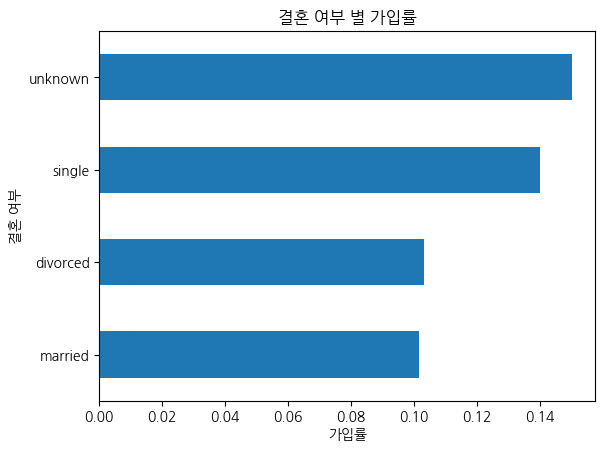

In [17]:
# marital vs y
target_ratio = bank_df.groupby("marital")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("결혼 여부 별 가입률")
plt.xlabel("가입률")
plt.ylabel("결혼 여부")
plt.show()

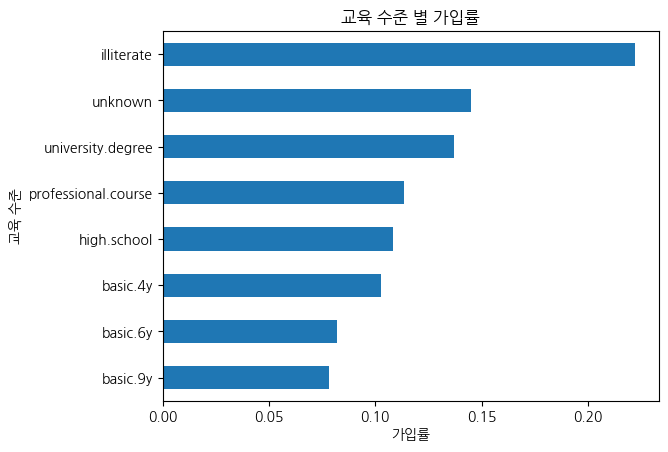

In [18]:
# education vs y
target_ratio = bank_df.groupby("education")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("교육 수준 별 가입률")
plt.xlabel("가입률")
plt.ylabel("교육 수준")
plt.show()

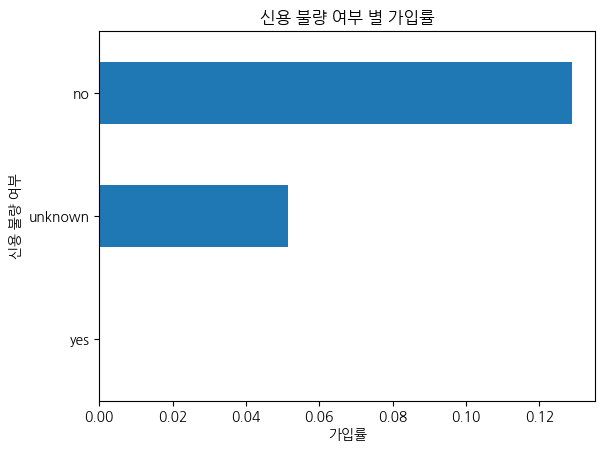

In [19]:
# default vs y
target_ratio = bank_df.groupby("default")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("신용 불량 여부 별 가입률")
plt.xlabel("가입률")
plt.ylabel("신용 불량 여부")
plt.show()

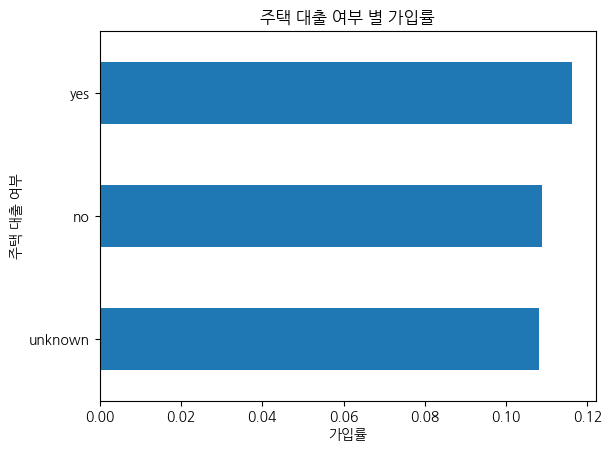

In [20]:
# housing vs y
target_ratio = bank_df.groupby("housing")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("주택 대출 여부 별 가입률")
plt.xlabel("가입률")
plt.ylabel("주택 대출 여부")
plt.show()

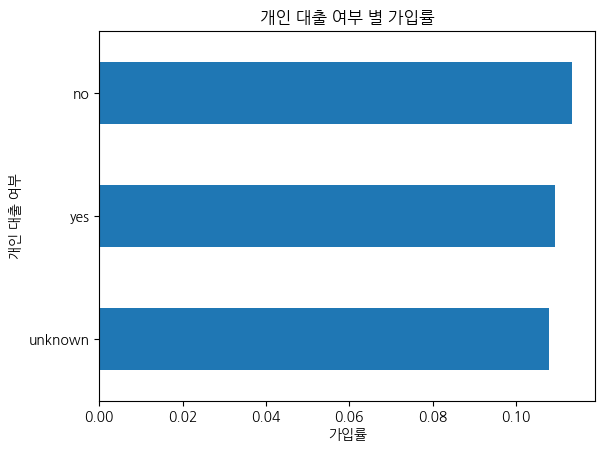

In [21]:
# loan vs y
target_ratio = bank_df.groupby("loan")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("개인 대출 여부 별 가입률")
plt.xlabel("가입률")
plt.ylabel("개인 대출 여부")
plt.show()

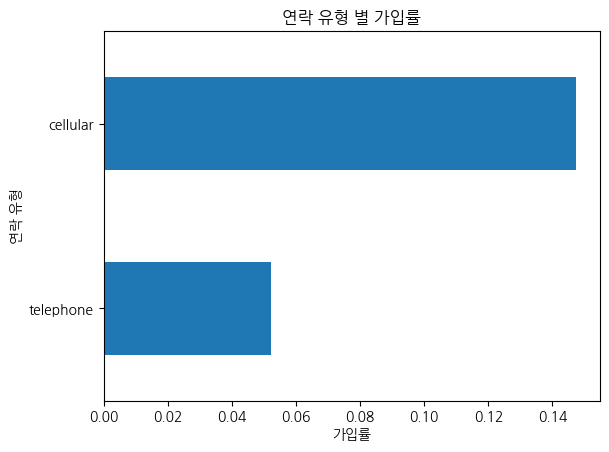

In [22]:
# contact vs y
target_ratio = bank_df.groupby("contact")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("연락 유형 별 가입률")
plt.xlabel("가입률")
plt.ylabel("연락 유형")
plt.show()

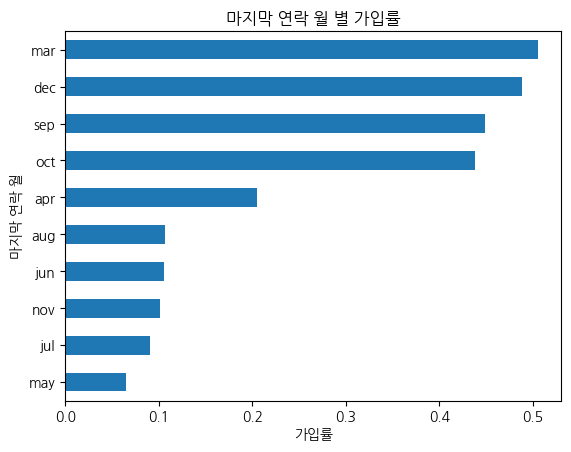

In [23]:
# month vs y
target_ratio = bank_df.groupby("month")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("마지막 연락 월 별 가입률")
plt.xlabel("가입률")
plt.ylabel("마지막 연락 월")
plt.show()

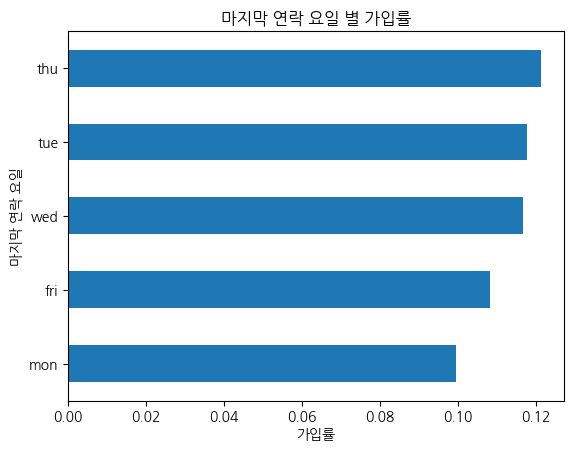

In [24]:
# day_of_week vs y
target_ratio = bank_df.groupby("day_of_week")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("마지막 연락 요일 별 가입률")
plt.xlabel("가입률")
plt.ylabel("마지막 연락 요일")
plt.show()

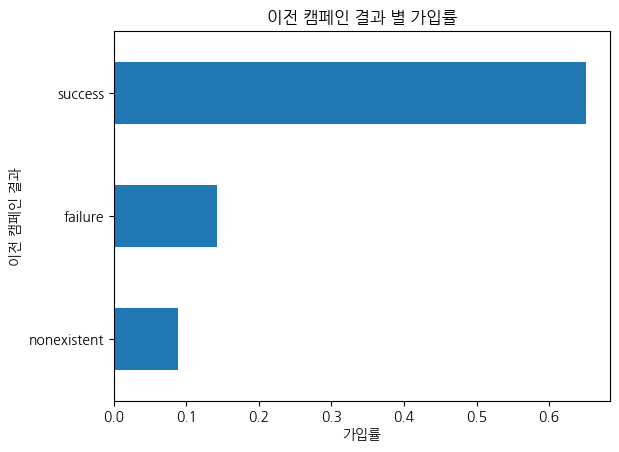

In [25]:
# poutcome vs y
target_ratio = bank_df.groupby("poutcome")["y"].mean().sort_values()
target_ratio.plot(kind="barh")
plt.title("이전 캠페인 결과 별 가입률")
plt.xlabel("가입률")
plt.ylabel("이전 캠페인 결과")
plt.show()

## 여러가지

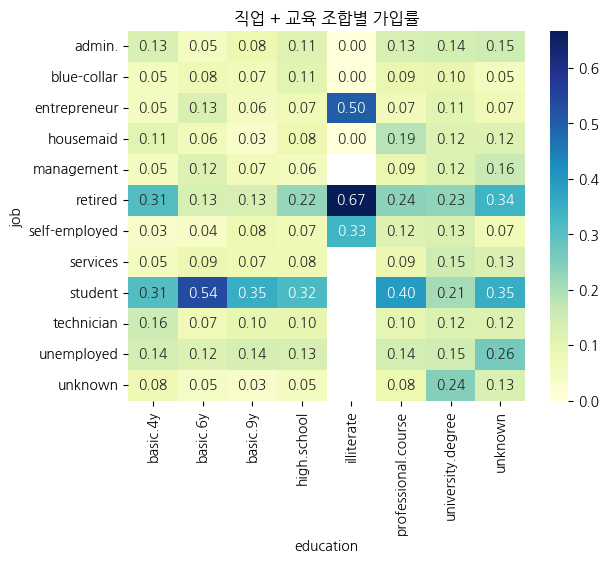

In [26]:
pivot = bank_df.pivot_table(index="job", columns="education", values="y", aggfunc="mean")
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("직업 + 교육 조합별 가입률")
plt.show()

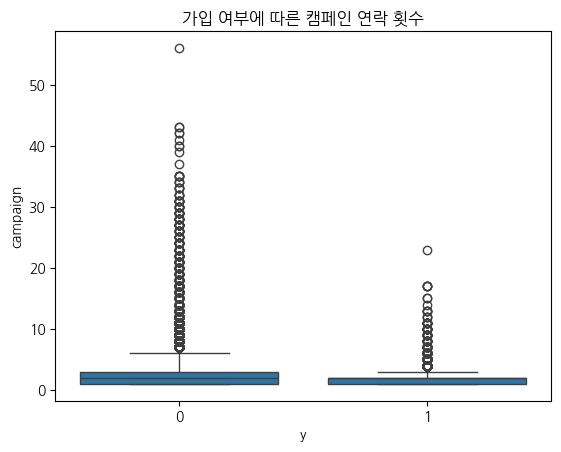

In [27]:
sns.boxplot(data=bank_df, x="y", y="campaign")
plt.title("가입 여부에 따른 캠페인 연락 횟수")
plt.show()

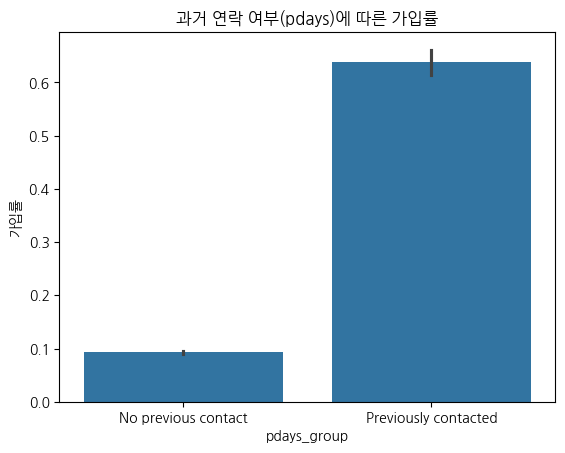

In [28]:
bank_df["pdays_group"] = bank_df["pdays"].apply(lambda x: "No previous contact" if x == 999 else "Previously contacted")
sns.barplot(data=bank_df, x="pdays_group", y="y")
plt.title("과거 연락 여부(pdays)에 따른 가입률")
plt.ylabel("가입률")
plt.show()

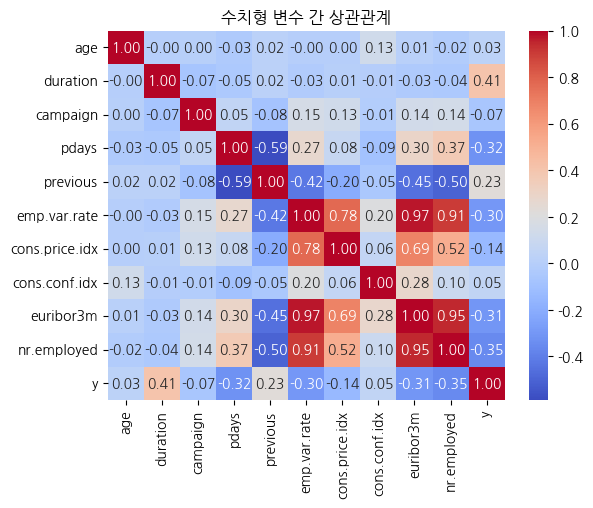

In [29]:
numeric_df = bank_df.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("수치형 변수 간 상관관계")
plt.show()

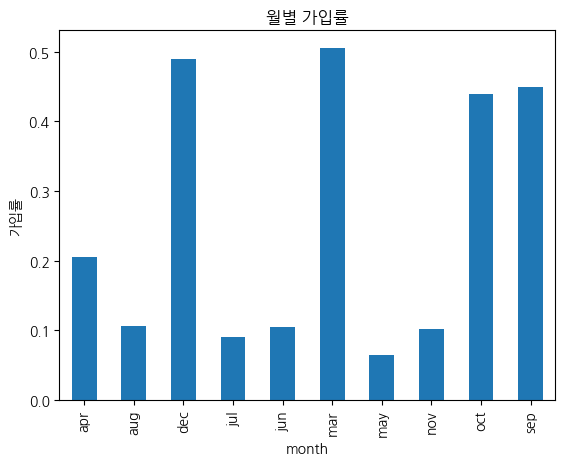

In [30]:
monthly_rate = bank_df.groupby("month")["y"].mean().sort_index()
monthly_rate.plot(kind="bar")
plt.title("월별 가입률")
plt.ylabel("가입률")
plt.show()

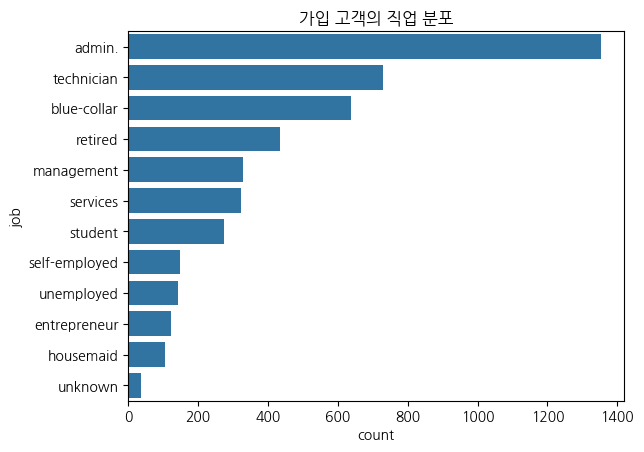

In [31]:
signed_up = bank_df[bank_df["y"] == 1]
sns.countplot(data=signed_up, y="job", order=signed_up["job"].value_counts().index)
plt.title("가입 고객의 직업 분포")
plt.show()

# 전처리

In [32]:
# 결측치 확인
bank_df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


- 결측치 없

In [33]:
from sklearn.preprocessing import LabelEncoder

# copy 생성
bank_copy_df = bank_df.copy()

# age 정규화(age 컬럼과 age_norm컬럼 두가지 비교 필요)
bank_copy_df["age_norm"] = (bank_copy_df["age"] - bank_copy_df["age"].min()) / (bank_copy_df["age"].max() - bank_copy_df["age"].min())

# job (One-Hot 인코딩, unknown 처리)
bank_copy_df["job"] = bank_copy_df["job"].replace("unknown", np.nan)
bank_copy_df = pd.get_dummies(bank_copy_df, columns=["job"], prefix="job", dummy_na=True)

# marital (One-Hot 인코딩, unknown 처리)
bank_copy_df["marital"] = bank_copy_df["marital"].replace("unknown", np.nan)
bank_copy_df = pd.get_dummies(bank_copy_df, columns=["marital"], prefix="marital", dummy_na=True)

# education (One-Hot 인코딩, unknown 처리)
bank_copy_df["education"] = bank_copy_df["education"].replace("unknown", np.nan)
bank_copy_df = pd.get_dummies(bank_copy_df, columns=["education"], prefix="edu", dummy_na=True)

# default (Label 인코딩, unknown = NaN 처리)
bank_copy_df["default"] = bank_copy_df["default"].replace("unknown", np.nan)
le_default = LabelEncoder()
bank_copy_df["default"] = le_default.fit_transform(bank_copy_df["default"].astype(str))

# housing (Label 인코딩)
le_housing = LabelEncoder()
bank_copy_df["housing"] = le_housing.fit_transform(bank_copy_df["housing"])

# loan (Label 인코딩)
le_loan = LabelEncoder()
bank_copy_df["loan"] = le_loan.fit_transform(bank_copy_df["loan"])

# contact (One-Hot 인코딩)
bank_copy_df = pd.get_dummies(bank_copy_df, columns=["contact"], prefix="contact")

# month (One-Hot 인코딩)
bank_copy_df = pd.get_dummies(bank_copy_df, columns=["month"], prefix="month")

# day_of_week (One-Hot 인코딩)
bank_copy_df = pd.get_dummies(bank_copy_df, columns=["day_of_week"], prefix="dow")

# duration (모델 학습 시 제외 권장, 예: 모델에서 overfitting 가능성 있음)
# bank_copy_df.drop(columns=["duration"], inplace=True)

# pdays (999 -> -1, contacted 여부 파생 변수 생성)
bank_copy_df["pdays"] = bank_copy_df["pdays"].replace(999, -1)
bank_copy_df["pdays_contacted"] = (bank_copy_df["pdays"] != -1).astype(int)

# poutcome (One-Hot 인코딩)
bank_copy_df = pd.get_dummies(bank_copy_df, columns=["poutcome"], prefix="pout")

# 불필요한 문자열 컬럼 제거
bank_copy_df.drop(columns=["y_label"], inplace=True)
bank_copy_df.drop(columns=["pdays_group"], inplace=True)

- duration 컬럼
    - duration: 마지막 통화의 길이 (초 단위)
    - ex) 고객과 상담원이 통화한 시간 120초 -> duration = 120

- 왜 제거해야 할까? (target leakage, 타겟 누수)

- 타겟 누수(정보 유출)
    - 머신러닝 모델이 예측하려는 정답(target)과 직접적으로 연결되거나 이후에 발생하는 정보가 학습에 포함되어 성능이 부풀려지는 현상

- duration은 타겟(y)과 강하게 연결됨
    - 현실적으로, 상담원이 통화를 길게 하면 고객이 예금에 가입할 확률 높음
    - 즉, 통화 시간이 길다는 건 이미 긍정적인 반응을 보였다는 것
    - 이런 데이터는 모델이 미래를 예측할 때 사용할 수 없는 정보임

        - 모델이 학습 시 "duration이 길면 가입이다!"라고 외워버림
        - 실제 캠페인 시작 전에 duration은 알 수 없음

- 따라서, duration은 다음 중 하나로 처리해야 함

|처리 방식|설명|
|---|---|
|❌ 학습에 사용 X|가장 추천되는 방법. 완전히 제거함|
|✅ 예측 후 분석용|모델이 예측한 이후, 사후적으로 duration의 영향력 분석 가능|
|⚠️ 특수 처리|예: duration 구간화 후 사용 (하지만 여전히 누수 위험 존재)|

- 결론
    - duration은 모델이 실제로 사용할 수 없는 미래 정보 -> 학습에 포함하면 안 됨
    - 대부분의 머신러닝 파이프라인에서는 완전히 제거하거나, 모델 해석용으로만 활용

# 모델링

## 결정 트리

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap

### duration 있는 모델

In [ ]:
# 특성과 타겟
X = bank_copy_df.drop(columns=["y"])
y = bank_copy_df["y"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링
scaler = StandardScaler()
if "age_norm" in X_train.columns:
    X_train["age_norm"] = scaler.fit_transform(X_train[["age_norm"]])
    X_test["age_norm"] = scaler.transform(X_test[["age_norm"]])

# 결정트리 모델
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]

# 평가
print("📌 Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n📌 Classification Report")
print(classification_report(y_test, y_pred))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix
[[6902  408]
 [ 441  487]]

📌 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.54      0.52      0.53       928

    accuracy                           0.90      8238
   macro avg       0.74      0.73      0.74      8238
weighted avg       0.90      0.90      0.90      8238

📌 ROC-AUC Score: 0.7344852646351242


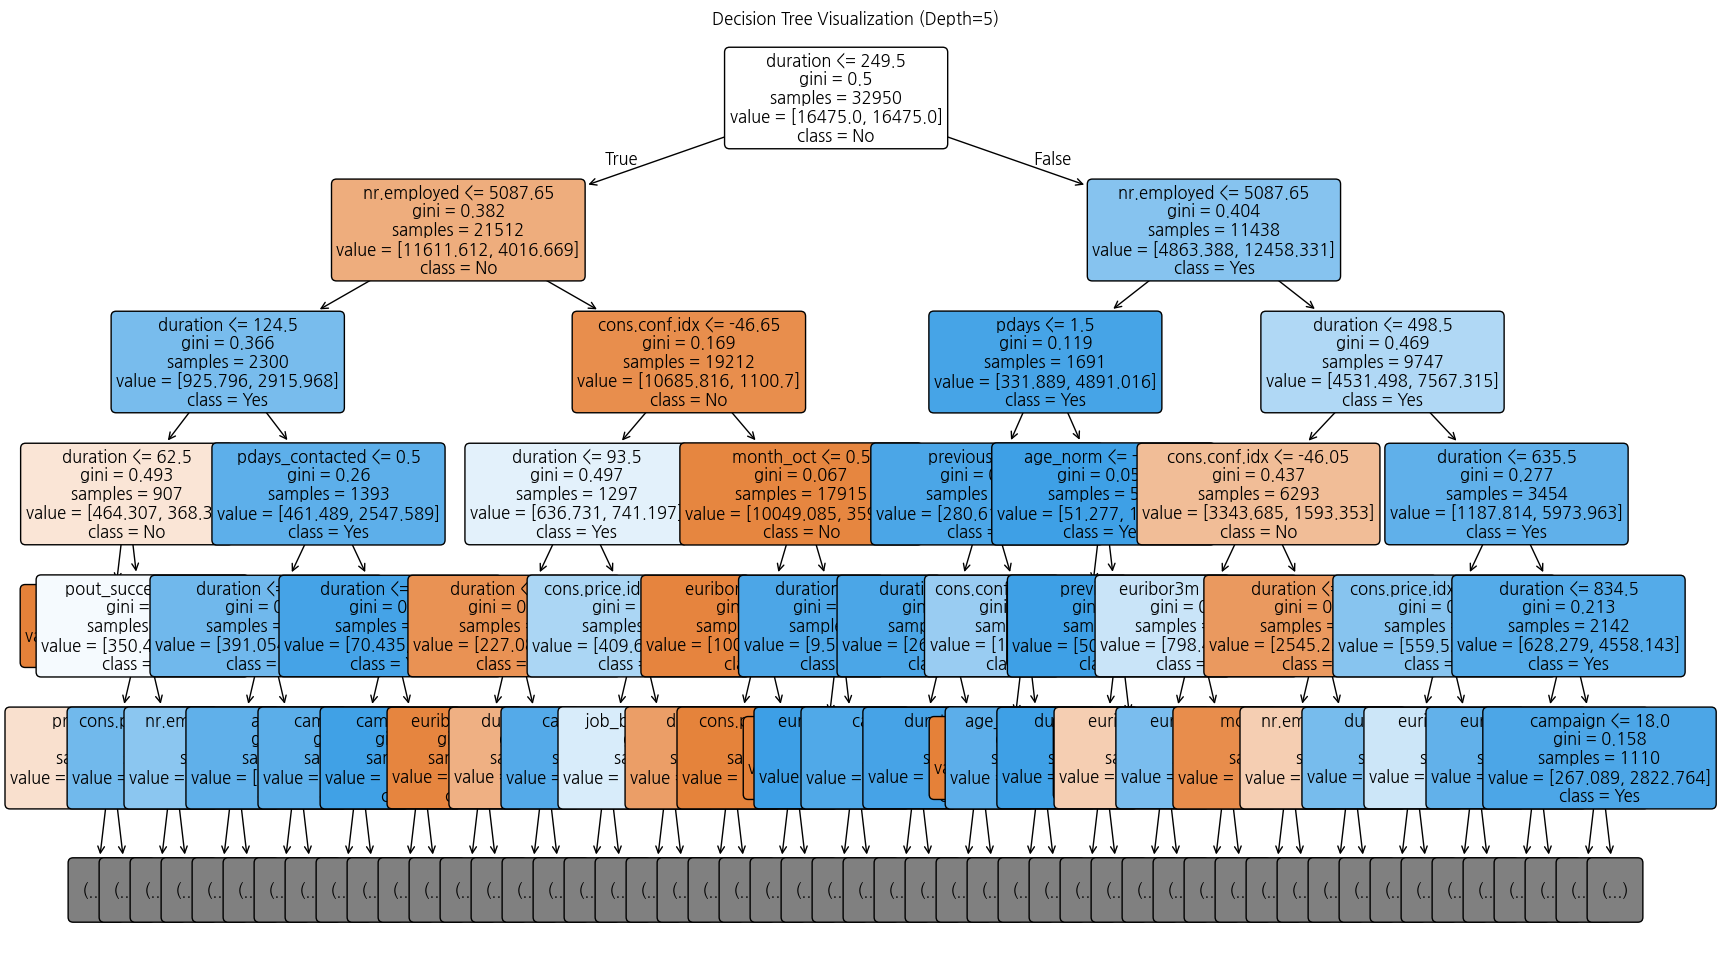

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(dt, max_depth=5, feature_names=X_train.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization (Depth=5)")
plt.show()

### duration 없는 모델

In [ ]:
# duration 제거
if "duration" in bank_copy_df.columns:
    bank_copy_df.drop(columns=["duration"], inplace=True)

# 특성과 타겟
X = bank_copy_df.drop(columns=["y"])
y = bank_copy_df["y"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링
scaler = StandardScaler()
if "age_norm" in X_train.columns:
    X_train["age_norm"] = scaler.fit_transform(X_train[["age_norm"]])
    X_test["age_norm"] = scaler.transform(X_test[["age_norm"]])

# 결정트리 모델
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]

# 평가
print("📌 Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n📌 Classification Report")
print(classification_report(y_test, y_pred))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix
[[6652  658]
 [ 611  317]]

📌 Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7310
           1       0.33      0.34      0.33       928

    accuracy                           0.85      8238
   macro avg       0.62      0.63      0.62      8238
weighted avg       0.85      0.85      0.85      8238

📌 ROC-AUC Score: 0.6262025183970942


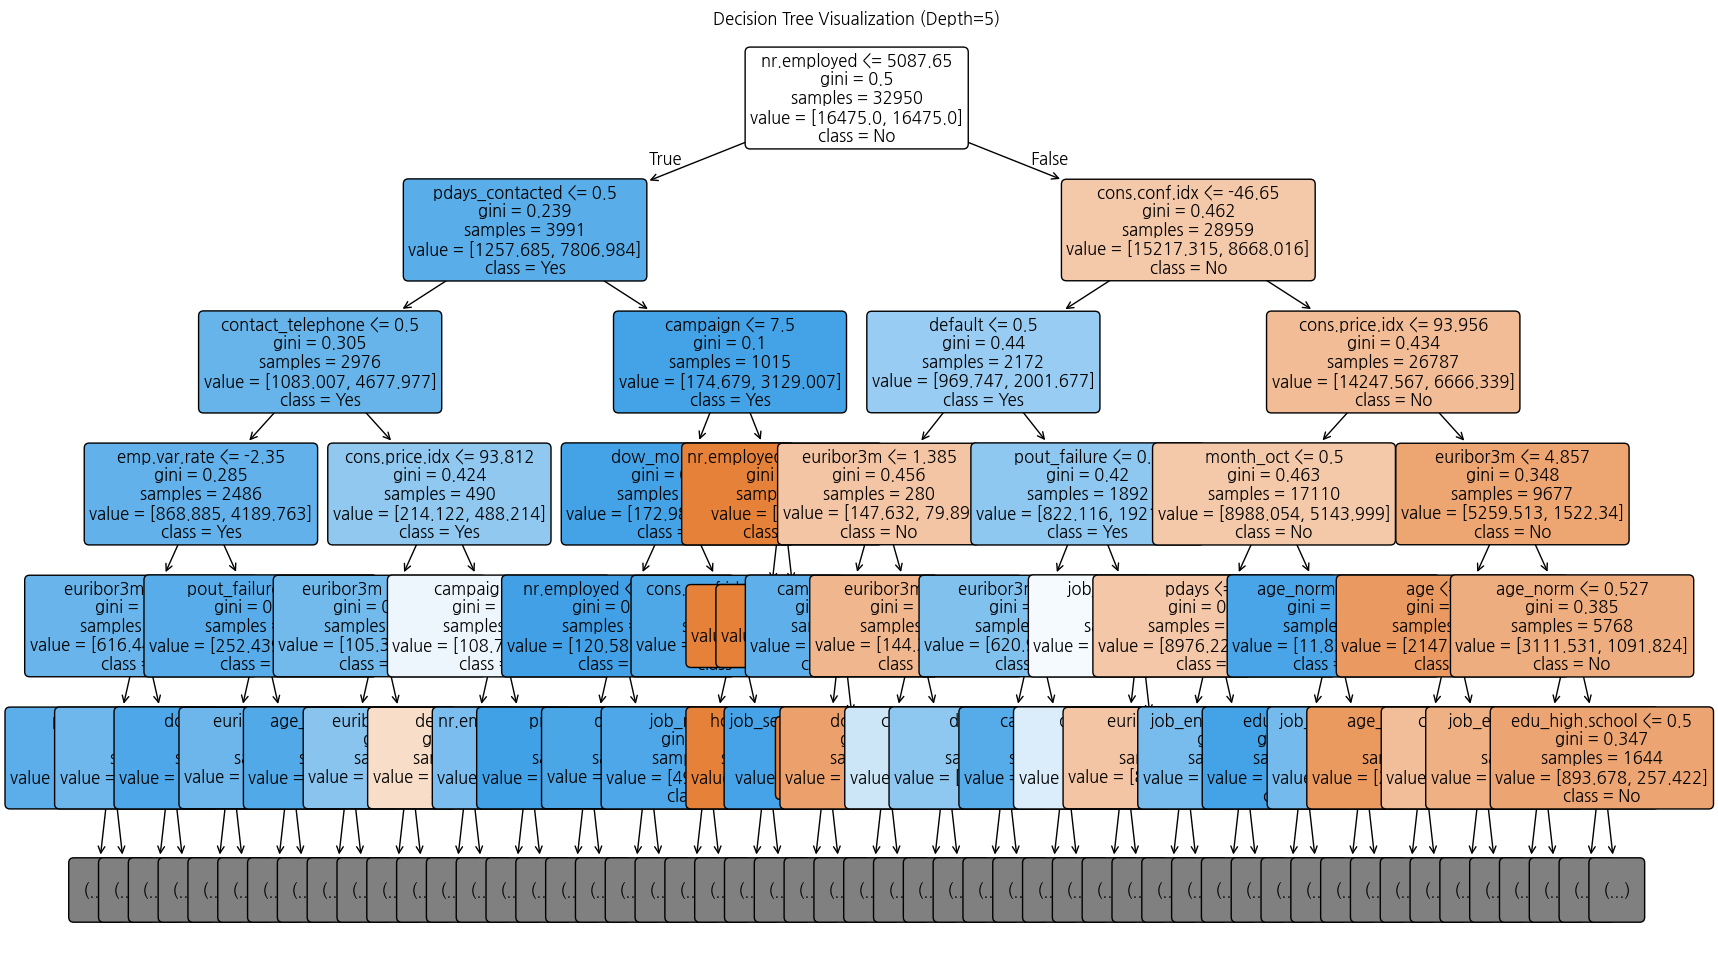

In [ ]:
plt.figure(figsize=(20, 12))
plot_tree(dt, max_depth=5, feature_names=X_train.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization (Depth=5)")
plt.show()

## 랜덤 포레스트

In [37]:
from sklearn.ensemble import RandomForestClassifier

### duration 있는 모델

In [38]:
# 데이터 분할 (특성과 타겟)
X = bank_copy_df.drop(columns=["y"])
y = bank_copy_df["y"]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링 (정규화된 수치 변수만 해당. 여기선 age_norm만 해당)
scaler = StandardScaler()
if "age_norm" in X_train.columns:
    X_train["age_norm"] = scaler.fit_transform(X_train[["age_norm"]])
    X_test["age_norm"] = scaler.transform(X_test[["age_norm"]])

# 모델 훈련 - 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("📌 Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n📌 Classification Report")
print(classification_report(y_test, y_pred))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix
[[7124  186]
 [ 482  446]]

📌 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.71      0.48      0.57       928

    accuracy                           0.92      8238
   macro avg       0.82      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238

📌 ROC-AUC Score: 0.9464117558611256


- TN (True Negative): 7124명 — 비가입 예측, 실제도 비가입
- FP (False Positive): 186명 — 가입 예측, 실제는 비가입
- FN (False Negative): 482명 — 비가입 예측, 실제는 가입
- TP (True Positive): 446명 — 가입 예측, 실제도 가입

- Classification Report 요약

|클래스|Precision|Recall|F1-score|Support|
|---|---|---|---|---|
|0 (비가입)|0.92|0.97|0.94|7310명|
|1 (가입)|0.57|0.29|0.39|928명|

- 전체 정확도: 92%
- 가입 클래스(1)의 Recall: 0.48 (실제 가입 고객 중 48%만 맞춤)
- ROC-AUC: 0.95 → 우수한 이진 분류 성능

### duration 없는 모델

In [39]:
# duration 제거 (캠페인 성공 여부를 유출하는 변수로 간주)
if "duration" in bank_copy_df.columns:
    bank_copy_df.drop(columns=["duration"], inplace=True)

# 데이터 분할 (특성과 타겟)
X = bank_copy_df.drop(columns=["y"])
y = bank_copy_df["y"]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링 (정규화된 수치 변수만 해당. 여기선 age_norm만 해당)
scaler = StandardScaler()
if "age_norm" in X_train.columns:
    X_train["age_norm"] = scaler.fit_transform(X_train[["age_norm"]])
    X_test["age_norm"] = scaler.transform(X_test[["age_norm"]])

# 모델 훈련 - 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("📌 Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n📌 Classification Report")
print(classification_report(y_test, y_pred))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix
[[7107  203]
 [ 655  273]]

📌 Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.57      0.29      0.39       928

    accuracy                           0.90      8238
   macro avg       0.74      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238

📌 ROC-AUC Score: 0.7822380330440115


- TN (True Negative): 7107명 — 비가입 예측, 실제도 비가입
- FP (False Positive): 203명 — 가입 예측, 실제는 비가입
- FN (False Negative): 655명 — 비가입 예측, 실제는 가입
- TP (True Positive): 273명 — 가입 예측, 실제도 가입

- Classification Report 요약

|클래스|Precision|Recall|F1-score|Support|
|---|---|---|---|---|
|0 (비가입)|0.92|0.97|0.94|7310명|
|1 (가입)|0.57|0.29|0.39|928명|

- 전체 정확도: 90%
- 가입 클래스(1)의 Recall: 0.29 (실제 가입 고객 중 29%만 맞춤)
- ROC-AUC: 0.78 → 그럭저럭 괜찮은 분류

### duration 컬럼 유무 비교

|항목|duration 포함|duration 제거|
|---|---|---|
|Accuracy|0.92|0.90|
|Precision (class 1)|0.71|0.57|
|Recall (class 1)|0.48|0.29|
|F1-score (class 1)|0.57|0.39|
|ROC-AUC|0.95|0.78|
|TP (가입 예측 성공)|446|273|
|FN (가입 놓침)|482|655|

1. duration 포함 -> 예측 성능 급상승
- recall: 0.29 -> 0.48
- ROC-AUC: 0.78 -> 0.95
    - 이는 duration 변수가 가입 여부(y)와 매우 밀접한 관계가 있음을 의미
    - ex) 통화가 길면 고객이 실제로 설득되었을 가능성이 높고, 결과적으로 가입했을 가능성도 높음

2. duration은 "사후적 변수"
- duration은 고객과 통화한 "결과로서의 시간 길이"이므로, 예측 시점(마케팅 시작 전)에는 알 수 없는 정보
    - 즉, 미래를 예측하기 위해 사용해서는 안 되는 변수
    - 모델이 y를 유출(leak)하는 셈

- 결론
    - duration 포함 모델: 높은 성능을 보여주지만 실제 마케팅 전략에는 쓸 수 없음
    - duration 제거 모델: 성능은 낮지만 현실적으로 타당한 예측 모델
        - duration은 제거하고, 다른 변수 개선 or class imbalance 해결 등으로 성능 향상 시도

- 데이터 누수 확인 (추후 분석)
    - 개념적 점검
        - 피쳐의 의미와 시점 점검
    - 실험적 점검
        - 통계적 / 모델 기반 분석
        - 단일 피쳐로 모델 학습
            - AUC, precision, recall 비정상적으로 높으면 해당 피쳐 누수 가능성 높음
        - SHAP 또는 permutation importance 확인
            - 피쳐 중요도 시각화를 통해 특정 피쳐가 너무 지배적인 경우 확인
        - 피처 제거 전후 성능 차이 (지금 해본 방식)
            - precision/recall이 급격히 하락하면 해당 피처가 정답을 직접적으로 알려줄 가능성 높음

### 성능 향상 시도

#### SMOTE, class_weight="balanced"

In [40]:
from imblearn.over_sampling import SMOTE

# duration 제거 (캠페인 성공 여부를 유출하는 변수로 간주)
if "duration" in bank_copy_df.columns:
    bank_copy_df.drop(columns=["duration"], inplace=True)

# 데이터 분할 (특성과 타겟)
X = bank_copy_df.drop(columns=["y"])
y = bank_copy_df["y"]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링 (정규화된 수치 변수만 해당. 여기선 age_norm만 해당)
scaler = StandardScaler()
if "age_norm" in X_train.columns:
    X_train["age_norm"] = scaler.fit_transform(X_train[["age_norm"]])
    X_test["age_norm"] = scaler.transform(X_test[["age_norm"]])

# SMOTE로 오버샘플링
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 모델 훈련 - 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train_smote, y_train_smote)

# 예측 및 평가
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("📌 Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n📌 Classification Report")
print(classification_report(y_test, y_pred))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix
[[6988  322]
 [ 566  362]]

📌 Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7310
           1       0.53      0.39      0.45       928

    accuracy                           0.89      8238
   macro avg       0.73      0.67      0.69      8238
weighted avg       0.88      0.89      0.88      8238

📌 ROC-AUC Score: 0.7849881627671117


|설정|Recall (y=1)|F1-score (y=1)|ROC-AUC|
|---|---|---|---|
|✅ 기존 모델 (duration 제거만)|0.29|0.39|0.782|
|✅ SMOTE 적용 + class_weight|0.39|0.45|0.785|

-> Recall과 F1 모두 향상

#### Threshold 조정

- Precision (정밀도): 예금 가입할 거라고 예측한 사람 중 실제로 가입한 비율
    - 잘못된 예측은 불필요한 마케팅 비용 발생

- Recall (재현율): 실제로 예금에 가입할 사람 중 모델이 얼마나 많이 맞췄는지
    - 낮으면 가입 가능성 높은 고객을 놓치는 문제

- 은행 마케팅 캠페인의 목적은?
    - 일반적으로는 "가입률을 높이고 마케팅 비용은 최소화"하는 것

|항목|Precision 중심|Recall 중심|
|---|---|---|
|의미|예측이 맞을 확률을 높이자|가입 가능성 높은 사람은 놓치지 말자|
|초점|고객 1명당 마케팅 비용이 클 때|잠재 고객이 희귀할 때|
|예시|전화, 상담 비용이 크고 리소스가 제한됨|많은 고객에게 메일·SMS를 보내는 캠페인|
|결과|False Positive ↓, True Positive ↓ (보수적)|False Negative ↓, False Positive ↑ (공격적)|

- 이 캠페인에 적용하면?
    - 예금에 가입한 비율은 약 11% 내외
    - 캠페인은 전화로 이뤄졌기 때문에 비용이 비쌈
    - 하지만 가입률이 매우 저조하므로 가입율을 높이는 것 우선시

- 현실적으로는 Precision과 Recall의 균형(F1-score) 혹은 Recall 중심 전략이 적합
    - False Positive: 예금 안 할 사람에게 전화함 -> 인건비, 고객 반감
    - False Negative: 예금할 사람을 놓침 -> 기회 손실 (덜 치명적일 수 있음)

- 정리: 어떤 경우 어떤 기준?

|전략 필요 조건|추천 지표|
|---|---|
|마케팅 비용이 크고 인력 리소스가 제한됨|Precision↑ or F1-score|
|예금 가입률을 최대화하고 싶다 (가망고객 절대 놓치면 안 됨)|Recall↑|
|균형 있게 성과를 보고 싶다|F1-score or ROC-AUC|

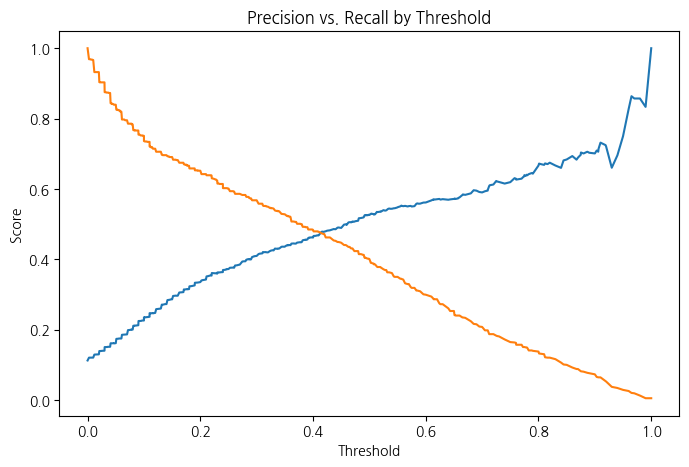

In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs. Recall by Threshold")
# plt.legend()
# plt.grid(True)
plt.show()

- 약 0.4 정도에서 교차
    - threshold=0.2 ~ 0.4 정도로 조정

In [ ]:
# duration 제거 (캠페인 성공 여부를 유출하는 변수로 간주)
if "duration" in bank_copy_df.columns:
    bank_copy_df.drop(columns=["duration"], inplace=True)

# 데이터 분할
X = bank_copy_df.drop(columns=["y"])
y = bank_copy_df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링
scaler = StandardScaler()
if "age_norm" in X_train.columns:
    X_train["age_norm"] = scaler.fit_transform(X_train[["age_norm"]])
    X_test["age_norm"] = scaler.transform(X_test[["age_norm"]])

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 랜덤 포레스트 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train_smote, y_train_smote)

# 확률 예측
y_proba = rf.predict_proba(X_test)[:, 1]

# Threshold = 0.2로 조정
y_pred_threshold = (y_proba >= 0.2).astype(int)

# 평가
print("📌 Confusion Matrix (Threshold=0.2)")
print(confusion_matrix(y_test, y_pred_threshold))

print("\n📌 Classification Report (Threshold=0.2)")
print(classification_report(y_test, y_pred_threshold))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix (Threshold=0.2)
[[6111 1199]
 [ 323  605]]

📌 Classification Report (Threshold=0.2)
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7310
           1       0.34      0.65      0.44       928

    accuracy                           0.82      8238
   macro avg       0.64      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238

📌 ROC-AUC Score: 0.7849881627671117


In [ ]:
# duration 제거 (캠페인 성공 여부를 유출하는 변수로 간주)
if "duration" in bank_copy_df.columns:
    bank_copy_df.drop(columns=["duration"], inplace=True)

# 데이터 분할
X = bank_copy_df.drop(columns=["y"])
y = bank_copy_df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링
scaler = StandardScaler()
if "age_norm" in X_train.columns:
    X_train["age_norm"] = scaler.fit_transform(X_train[["age_norm"]])
    X_test["age_norm"] = scaler.transform(X_test[["age_norm"]])

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 랜덤 포레스트 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train_smote, y_train_smote)

# 확률 예측
y_proba = rf.predict_proba(X_test)[:, 1]

# Threshold = 0.3으로 조정
y_pred_threshold = (y_proba >= 0.3).astype(int)

# 평가
print("📌 Confusion Matrix (Threshold=0.3)")
print(confusion_matrix(y_test, y_pred_threshold))

print("\n📌 Classification Report (Threshold=0.3)")
print(classification_report(y_test, y_pred_threshold))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix (Threshold=0.3)
[[6551  759]
 [ 401  527]]

📌 Classification Report (Threshold=0.3)
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7310
           1       0.41      0.57      0.48       928

    accuracy                           0.86      8238
   macro avg       0.68      0.73      0.70      8238
weighted avg       0.88      0.86      0.87      8238

📌 ROC-AUC Score: 0.7849881627671117


In [ ]:
# duration 제거 (캠페인 성공 여부를 유출하는 변수로 간주)
if "duration" in bank_copy_df.columns:
    bank_copy_df.drop(columns=["duration"], inplace=True)

# 데이터 분할
X = bank_copy_df.drop(columns=["y"])
y = bank_copy_df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링
scaler = StandardScaler()
if "age_norm" in X_train.columns:
    X_train["age_norm"] = scaler.fit_transform(X_train[["age_norm"]])
    X_test["age_norm"] = scaler.transform(X_test[["age_norm"]])

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 랜덤 포레스트 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train_smote, y_train_smote)

# 확률 예측
y_proba = rf.predict_proba(X_test)[:, 1]

# Threshold = 0.4로 조정
y_pred_threshold = (y_proba >= 0.4).astype(int)

# 평가
print("📌 Confusion Matrix (Threshold=0.4)")
print(confusion_matrix(y_test, y_pred_threshold))

print("\n📌 Classification Report (Threshold=0.4)")
print(classification_report(y_test, y_pred_threshold))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix (Threshold=0.4)
[[6787  523]
 [ 479  449]]

📌 Classification Report (Threshold=0.4)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7310
           1       0.46      0.48      0.47       928

    accuracy                           0.88      8238
   macro avg       0.70      0.71      0.70      8238
weighted avg       0.88      0.88      0.88      8238

📌 ROC-AUC Score: 0.7849881627671117


|지표|Threshold=0.5|Threshold=0.4|Threshold=0.3|Threshold=0.2|
|---|---|---|---|---|
|Accuracy|0.89|0.88|0.86|0.83|
|Precision (1)|0.53|0.46|0.41|0.34|
|Recall (1)|0.39|0.48|0.57|0.65|
|F1-score (1)|0.45|0.47|0.48|0.44|
|ROC-AUC|0.7849|0.7849|0.7849|0.7849|

- Threshold=0.3
    - Recall (민감도) 증가: 실제 정기예금 가입 고객 중 더 많은 수를 포착함 -> 마케팅 기회 포착 증가
    - Precision 감소: 예측한 가입 고객 중 실제 가입자가 아닌 비율이 더 많아짐 -> 불필요한 마케팅 비용 증가 가능성
    - F1-score 소폭 개선: Precision과 Recall 균형 측면에서 약간 향상됨
    - Accuracy 하락: 전체 정밀도 측면에서는 소폭 손해지만, class imbalance 환경에서는 큰 문제 아님
    - ROC-AUC 동일: 모델의 전반적인 분류 능력은 변함 없음 (threshold-independent 지표이므로)

#### 하이퍼파라미터 튜닝

- 파라미터 그리드 정의
    - 정해진 기준 없음
    - 보편적인 값 넣어보고 지속적으로 범위를 좁혀가며 최적의 값을 찾아 나가는 과정
- 현업에서도 어떤 명확한 기준과 정답이 있는게 아님
- 일반적인 상황에서는 모델 내에서 자동화 되어있는 부분이 있어서 이정도로 하나하나 건들 내용까지는 없음

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 튜닝할 파라미터 그리드 정의
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

# 랜덤 포레스트 모델 객체
rf_base = RandomForestClassifier(random_state=42, class_weight="balanced")

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, scoring="roc_auc", cv=3, n_jobs=-1, verbose=2)

# 하이퍼파라미터 튜닝 실행
grid_search.fit(X_train_smote, y_train_smote)

# 최적 모델 추출
best_rf = grid_search.best_estimator_

print("✅ 최적 하이퍼파라미터:")
print(grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ 최적 하이퍼파라미터:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


1. "n_estimators": [200, 300, 400]
    - 기존 최적값: 200
    - 범위 확장 이유: 트리 수가 많을수록 예측이 더 안정 (계산 비용도 증가)
    - 범위 확장 목적: 300, 400으로 늘렸을 때 성능 향상 추세가 있는지 확인
        - 만약 성능이 크게 향상되지 않으면 200으로 다시 고정 가능
        - 너무 많은 값은 비효율적
        - 적절한 범위 내에서 탐색

2. "max_depth": [None, 30, 50]
    - 기존 최적값: None
    - None: 트리 깊이에 제한 없음 → 과적합 가능성
        - 30, 50: 깊이를 제한함으로써 과적합을 방지하고 일반화 성능 향상 가능
        - 이 숫자들은 실제 트리가 너무 얕지도, 너무 깊지도 않게 제한하는 실용적 깊이

📌 참고: 깊이를 제한하면서도 성능을 유지할 수 있다면, 더 빠르고 안정적인 모델을 만들 수 있음

3. "min_samples_split": [2, 3, 4]
    - 기존 최적값: 2
    - 이 값은 노드를 분할하기 위한 최소 샘플 수를 의미
    - 기본값은 2 → 가장 민감하게 나뉨
    - 3, 4는 분할 조건을 더 엄격하게 만들어 노드의 과도한 분할(과적합)을 방지
    - 작은 범위 내에서 조절하는 이유: 너무 크면 분할이 덜 되어 성능 저하 가능

4. "min_samples_leaf": [1, 2]
    - 기존 최적값: 1
    - 리프 노드에 필요한 최소 샘플 수
    - 1은 과적합 위험이 있음
    - 2로 늘려보며 과적합 감소 및 일반화 성능 향상 가능성 테스트
    - 실전에서는 종종 1~5 사이에서 튜닝함

5. "max_features": ["log2"]
    - 기존 최적값: "log2"
    - 기존 탐색 결과에서 "log2"가 "sqrt"보다 성능이 좋았음
    - 따라서 탐색 범위를 좁히고 "log2"로 고정해서 다른 파라미터에 집중

📌 범위가 넓을수록 조합 수가 급격히 증가하므로, 좋았던 항목은 고정해서 연산 부담 줄이는 전략

|파라미터|조정 방향|목적|
|---|---|---|
|n_estimators|확장|안정성과 성능 향상 추세 확인|
|max_depth|제한 추가|과적합 방지, 일반화 성능 향상|
|min_samples_split|세분화|과도한 분할 방지|
|min_samples_leaf|최소 단위 조정|노드의 안정성 확보|
|max_features|고정|좋은 조합은 고정, 탐색 효율화|

In [ ]:
# 튜닝할 파라미터 그리드 정의
param_grid_refined = {
    "n_estimators": [200, 300, 400],
    "max_depth": [None, 30, 50],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2],
    "max_features": ["log2"]
}

# 랜덤 포레스트 모델 객체
rf_base = RandomForestClassifier(random_state=42, class_weight="balanced")

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid_refined, scoring="roc_auc", cv=3, n_jobs=-1, verbose=2)

# 하이퍼파라미터 튜닝 실행
grid_search.fit(X_train_smote, y_train_smote)

# 최적 모델 추출
best_rf = grid_search.best_estimator_

print("✅ 최적 하이퍼파라미터:")
print(grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ 최적 하이퍼파라미터:
{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


|파라미터|조정 범위|이유|
|---|---|---|
|n_estimators|[350, 400, 450]|이전 결과에서 400이 최적이었음 → 그 주변에서 수렴 확인. 450에서 성능 개선이 없다면 400으로 고정 가능.|
|max_depth|[25, 30, 35]|이전엔 None → 30으로 바뀜. 즉, 깊이 제한이 성능에 도움을 준다는 의미. 25, 35 범위에서 더 좋은 depth를 찾아 정밀 조정.|
|min_samples_split|[2, 3]|계속해서 2가 최적값으로 유지됨. 다만 3도 미세 조정으로 유의미한 차이가 있을 수 있음.|
|min_samples_leaf|[1, 2]|여전히 1이 최적값이지만, 과적합 위험을 고려해 2를 추가. 성능 차이가 없다면 더 일반화된 모델 선택 가능.|
|max_features|["log2"]|이전 두 번의 탐색에서 모두 log2가 우세. 이미 충분히 탐색됨 → 고정해서 다른 변수에 집중.|

In [ ]:
# 튜닝할 파라미터 그리드 정의
param_grid_final = {
    "n_estimators": [350, 400, 450],
    "max_depth": [25, 30, 35],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2],
    "max_features": ["log2"]
}

# 랜덤 포레스트 모델 객체
rf_base = RandomForestClassifier(random_state=42, class_weight="balanced")

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid_final, scoring="roc_auc", cv=3, n_jobs=-1, verbose=2)

# 하이퍼파라미터 튜닝 실행
grid_search.fit(X_train_smote, y_train_smote)

# 최적 모델 추출
best_rf = grid_search.best_estimator_

print("✅ 최적 하이퍼파라미터:")
print(grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ 최적 하이퍼파라미터:
{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 450}


In [ ]:
# 확률 예측
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Threshold = 0.3으로 조정
y_pred_threshold = (y_proba >= 0.3).astype(int)

# 평가
print("📌 Confusion Matrix (Threshold=0.4)")
print(confusion_matrix(y_test, y_pred_threshold))

print("\n📌 Classification Report (Threshold=0.4)")
print(classification_report(y_test, y_pred_threshold))

print("📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

📌 Confusion Matrix (Threshold=0.4)
[[6538  772]
 [ 403  525]]

📌 Classification Report (Threshold=0.4)
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      7310
           1       0.40      0.57      0.47       928

    accuracy                           0.86      8238
   macro avg       0.67      0.73      0.69      8238
weighted avg       0.88      0.86      0.87      8238

📌 ROC-AUC Score: 0.7828099939855653


- 최종 모델 성능 요약

|항목|결과|
|---|---|
|Accuracy|86%|
|Precision (class 1)|0.40|
|Recall (class 1)|0.57|
|F1-score (class 1)|0.47|
|ROC-AUC Score|0.783|
|Confusion Matrix|[6538, 772]
||[403, 525]|

- 이전 모델과 비교 (threshold=0.3, 튜닝 전)

|항목|튜닝 전|튜닝 후|변화|
|---|---|---|---|
|Precision (1)|0.46|0.40|감소|
|Recall (1)|0.48|0.57|증가|
|F1-score (1)|0.47|0.47|동일|
|ROC-AUC Score|0.785|0.783|소폭 감소|
|Accuracy|88%|86%|소폭 감소|

- 해석 및 제안
    - 튜닝 결과 Recall의 증가를 이끌어 냄
        - F-1 score의 변화 없이 Recall이 증가하여
        - 균형감 있게 Recall의 증가를 이끌어 냈다고 볼 수 있음

- 추가 개선 여지
    - 파생 변수 생성
    - 스태킹 앙상블
    - XGBoost, LightGBM 등 gradient boosting 계열 모델 활용 도 고려

#### 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


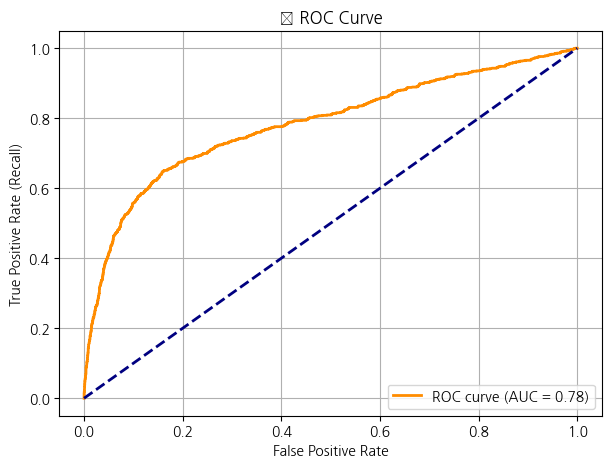

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("📈 ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


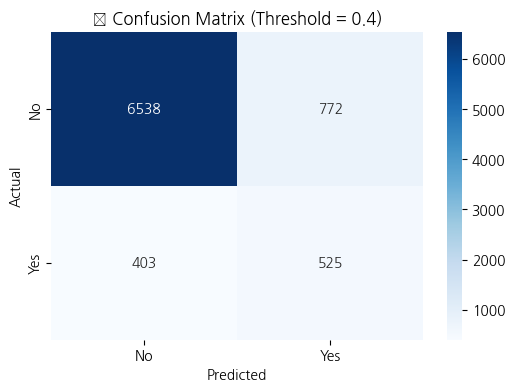

In [ ]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("📊 Confusion Matrix (Threshold = 0.4)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-47-ba25e42732e4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(15), x="Importance", y="Feature", palette="viridis")
<ipython-input-47-ba25e42732e4>:10: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


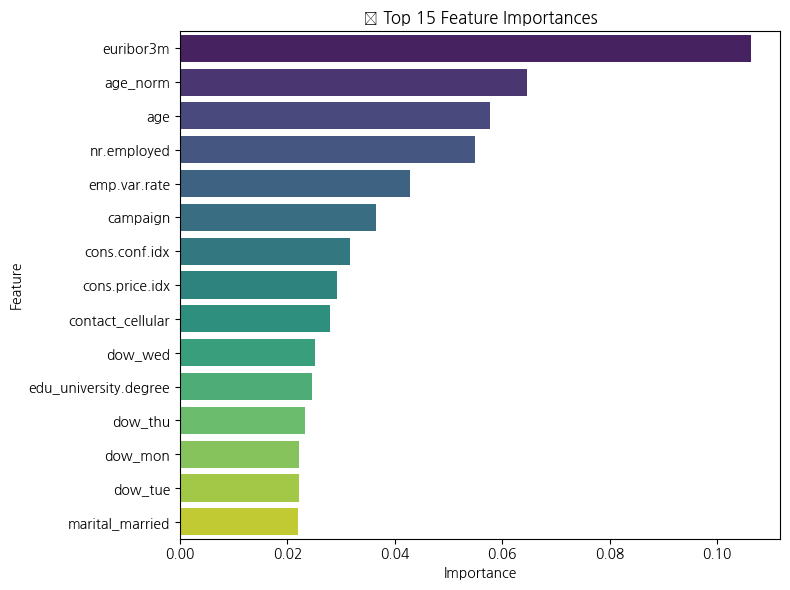

In [ ]:
# Feature Importance
importances = best_rf.feature_importances_
feature_names = X_train.columns
feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df = feat_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feat_df.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("📌 Top 15 Feature Importances")
plt.tight_layout()
plt.show()

1. 모델 관점에서의 해석
- 대부분의 변수들이 모델 예측에 기여하는 비중이 낮다
- 즉, 모델이 특정 몇 개의 변수에만 크게 의존하거나, 모든 변수들이 예측 성능에 큰 영향을 주지 못하고 있음

2. 상대적 중요도(Relative Importance)
- Feature Importance는 상대적인 값 (일반적으로 모든 변수의 중요도를 합쳐 1 또는 100으로 맞추는 방식)
- 변수 개수가 많을수록 각 변수의 중요도가 작게 나타나는 것은 정상적
    - ex) 변수 20개가 있고 골고루 중요하면 각 변수 중요도는 약 0.05 수준일 수 있음.

3. 가능한 원인 분석
- 변수 간 중복/상관성이 높은 경우 → 중요도가 분산될 수 있음
- 모델이 적절하게 학습되지 않음 → ex) 하이퍼파라미터 부적절, 학습 부족
- 변수 자체의 정보량이 적음 → 실제로 타깃과의 관련성 부족
- 스케일링, 인코딩 등 전처리 문제

4. 진단 및 개선 방안

|방법|설명|
|---|---|
|변수 선택/제거|Feature Importance가 0에 가까운 변수는 제거해도 무방할 수 있음|
|다른 모델로 비교|예: XGBoost, LightGBM, RandomForest 등 다양한 모델로 중요도 비교|
|Shapley 값 사용|SHAP를 사용하면 더 정교한 변수 영향력 분석 가능|
|파생 변수 생성|변수 간 상호작용 또는 비선형 파생 변수 생성으로 중요도 증가 가능|
|모델 튜닝|하이퍼파라미터 조정, 과적합/과소적합 해소 시도|

# 결론

1. 고비용 비효율 마케팅 방지
- 기존엔 모든 고객에게 전화를 걸어야 했지만, 이제는 예측 확률이 높은 고객만 타겟팅 가능
    - 불필요한 콜 비용 절감
    - 관심 없는 고객의 불만 감소
    - 콜센터 상담사의 리소스 효율화

2. Threshold 조정 → 마케팅 전략 차별화
- 현재 threshold=0.3에서 Recall(1 class)이 0.57로 과반 이상의 잠재 가입 고객을 포착
- 하지만 Precision(1 class)=0.40 → 실제로 가입 안 할 사람에게도 연락할 가능성 존재

해결책

|전략 유형|Threshold 조정|활용 방식|
|---|---|---|
|공격형 마케팅|↓ 낮춤 (0.3 등)|Recall ↑ → 더 많은 사람에게 전화, 신상품 홍보 집중|
|방어형 마케팅|↑ 높임 (0.5~0.6)|Precision ↑ → 성공 확률 높은 고객만 콜, 콜센터 비용 절감 목적|

3. 고객 세분화 캠페인 전략
- 모델의 예측 결과(y_proba)를 기반으로 다음처럼 등급 분류하여 차별화된 마케팅 전략 수행

|예측 확률|등급|전략|
|---|---|---|
|> 0.8|A등급|전화 + 맞춤 혜택 제공|
|0.6 ~ 0.8|B등급|이메일 or SMS 우선|
|0.4 ~ 0.6|C등급|다음 캠페인 대상 고려|
|< 0.4|D등급|연락 제외 or 장기 nurture 대상|

4. 이탈 가능성 높은 고객 사전 차단
- 가입 가능성이 낮은 고객에게 반복적으로 연락하면 이탈 확률 증가
    - 모델로 가입 확률이 낮은 고객을 미리 식별, 이들에게는 연락 횟수 제한, 메시지 방식 변경 등의 정책 도입

5. 마케팅 효과 분석 및 ROI 측정 기반 제공
- 예측 모델 기반으로 성과 추적 용이
    - ex) 예측 확률 > 0.6인 고객군에 대한 실제 가입률 → 캠페인 성과 정량화 가능